# Problem Statement: To define a patient's health status based on their diagnostic data

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read Diagnosis Data

In [2]:
df1 = pd.read_csv('Diagnosis.csv')
df1.head()

,Patient_id,Diag_date,ICD10
0,P00001,2015-12-06,N92.6
1,P00001,2015-12-06,O26.842
2,P00001,2015-12-13,O26.842
3,P00001,2016-02-29,O26.843
4,P00001,2016-03-27,O26.843


In [3]:
df1.shape

(660092, 3)

In [4]:
char = "."
func = lambda x: "".join(x for x in str(x.split()) if x not in char)
df1['ICD10'] = df1['ICD10'].apply(func).str.replace(r'\W','')
df1.head()

,Patient_id,Diag_date,ICD10
0,P00001,2015-12-06,N926
1,P00001,2015-12-06,O26842
2,P00001,2015-12-13,O26842
3,P00001,2016-02-29,O26843
4,P00001,2016-03-27,O26843


In [5]:
n = len(pd.unique(df1['Patient_id']))
print(n)

84059


# Read CCS data

In [6]:
df2 = pd.read_csv('ccs.csv')
df2.head()

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
2,A009,"Cholera, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
3,A0100,"Typhoid fever, unspecified",Diseases of the digestive system,Intestinal infection [135.],Intestinal infection
4,A0101,Typhoid meningitis,Diseases of the nervous system and sense organs,Central nervous system infection,Meningitis (except that caused by tuberculosis...


In [7]:
df2.shape

(72167, 5)

# Merge Diagnosis & CCS data

In [8]:
df3 = pd.merge(df1, df2, left_on=['ICD10'], right_on=['diag'], how = 'left')
df3.head()

,Patient_id,Diag_date,ICD10,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
0,P00001,2015-12-06,N926,N926,"Irregular menstruation, unspecified",Diseases of the genitourinary system,Diseases of female genital organs,Menstrual disorders
1,P00001,2015-12-06,O26842,O26842,"Uterine size-date discrepancy, second trimester",Complications of pregnancy; childbirth; and th...,Complications mainly related to pregnancy,Other complications of pregnancy
2,P00001,2015-12-13,O26842,O26842,"Uterine size-date discrepancy, second trimester",Complications of pregnancy; childbirth; and th...,Complications mainly related to pregnancy,Other complications of pregnancy
3,P00001,2016-02-29,O26843,O26843,"Uterine size-date discrepancy, third trimester",Complications of pregnancy; childbirth; and th...,Complications mainly related to pregnancy,Other complications of pregnancy
4,P00001,2016-03-27,O26843,O26843,"Uterine size-date discrepancy, third trimester",Complications of pregnancy; childbirth; and th...,Complications mainly related to pregnancy,Other complications of pregnancy


In [9]:
df3.shape

(660092, 8)

# Check for missing values

In [10]:
df3.isnull().apply(pd.value_counts)

,Patient_id,Diag_date,ICD10,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
False,660092.0,660086,660092.0,659337,659337,659337,659337,659337
True,NaN,6,NaN,755,755,755,755,755


In [11]:
df3 = df3.fillna(0)
df3 = df3.drop_duplicates(['Patient_id', 'ICD10'])

# Most common diagnosis (ICD code) 

In [12]:
df4 = df3.groupby('ICD10').count().sort_values(by = 'Patient_id', ascending=False)
df4=df4.reset_index()
df4.head()

,ICD10,Patient_id,Diag_date,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
0,Z0000,20248,20248,20248,20248,20248,20248,20248
1,Z01419,11046,11046,11046,11046,11046,11046,11046
2,Z1231,7711,7711,7711,7711,7711,7711,7711
3,I10,7570,7570,7570,7570,7570,7570,7570
4,J069,6438,6438,6438,6438,6438,6438,6438


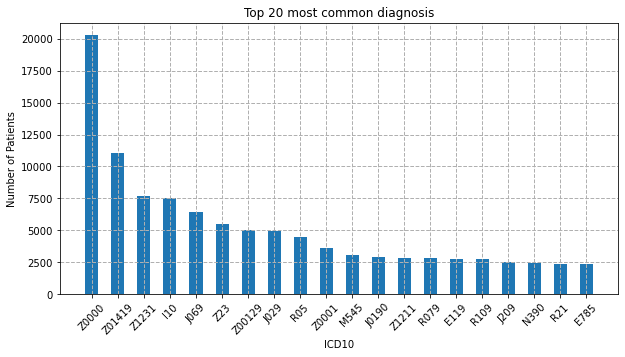

In [13]:
plt.figure(figsize=(10,5))

ICD10 = df4['ICD10'].tolist()[:20]
Patients = df4['Patient_id'].tolist()[:20]

plt.bar(ICD10, Patients, width=0.5)

plt.xlabel('ICD10')
plt.ylabel('Number of Patients')
plt.title('Top 20 most common diagnosis')

plt.xticks(ICD10, rotation=45)
plt.grid(True, linewidth = 1, linestyle='--')


In [14]:
df2.loc[df2['diag']=='Z0000']

,diag,diag_desc,ccs_1_desc,ccs_2_desc,ccs_3_desc
70922,Z0000,Encntr for general adult medical exam w/o abno...,Symptoms; signs; and ill-defined conditions an...,Factors influencing health care,Medical examination/evaluation


# Patient health status

In [18]:
pat_id = str(input('Enter Patient id between P00001-P99997:'))

if any(df3['Patient_id'] == pat_id):
    icd_code = ((df3.loc[df3['Patient_id']== pat_id])['ICD10'].values).tolist() 
    ccs_3 = ((df3.loc[df3['Patient_id']== pat_id])['ccs_1_desc'].values).tolist()
    out = list(zip(icd_code,ccs_3))
    #print(out)        
    icd10 =[]
    diag = []

    for x,y in out: 
        if y != 0:
            diag.append(y)
        else:
            icd10.append(x)    
 
    if len(diag)!=0:
        print ("Patient %s has:" % pat_id)
        diag = list(set(diag))
        for i in diag:
            print ('-',i)        
        
    if len(icd10)!=0: 
        print ("However, some ICD10 codes do not have CCS codes:", ic10)
        
else:
        print ("Patient ID not found")     



Enter Patient id between P00001-P99997:P12333
Patient P12333 has:
- Neoplasms
- Mental Illness
- Symptoms; signs; and ill-defined conditions and factors influencing health status
